In [1]:
# импортируем необходимые библиотеки, классы и функции
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
# отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [3]:
# настроим удобное отображение графиков и таблиц
%matplotlib inline
plt.rc('figure', figsize=(18, 5))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 20

In [4]:
# загрузим данные
s = pd.read_csv(
    'FEDFUNDS.csv', 
    header=0, 
    index_col=0, 
    parse_dates=True, 
    squeeze=True)

# оставим данные только до 2008 года
s = s[:'2007']
s

DATE
1954-07-01   0.80
1954-08-01   1.22
1954-09-01   1.06
1954-10-01   0.85
1954-11-01   0.83
             ... 
2007-08-01   5.02
2007-09-01   4.94
2007-10-01   4.76
2007-11-01   4.49
2007-12-01   4.24
Name: FEDFUNDS, Length: 642, dtype: float64

In [5]:
s.values

array([ 0.8 ,  1.22,  1.06,  0.85,  0.83,  1.28,  1.39,  1.29,  1.35,
        1.43,  1.43,  1.64,  1.68,  1.96,  2.18,  2.24,  2.35,  2.48,
        2.45,  2.5 ,  2.5 ,  2.62,  2.75,  2.71,  2.75,  2.73,  2.95,
        2.96,  2.88,  2.94,  2.84,  3.  ,  2.96,  3.  ,  3.  ,  3.  ,
        2.99,  3.24,  3.47,  3.5 ,  3.28,  2.98,  2.72,  1.67,  1.2 ,
        1.26,  0.63,  0.93,  0.68,  1.53,  1.76,  1.8 ,  2.27,  2.42,
        2.48,  2.43,  2.8 ,  2.96,  2.9 ,  3.39,  3.47,  3.5 ,  3.76,
        3.98,  4.  ,  3.99,  3.99,  3.97,  3.84,  3.92,  3.85,  3.32,
        3.23,  2.98,  2.6 ,  2.47,  2.44,  1.98,  1.45,  2.54,  2.02,
        1.49,  1.98,  1.73,  1.17,  2.  ,  1.88,  2.26,  2.61,  2.33,
        2.15,  2.37,  2.85,  2.78,  2.36,  2.68,  2.71,  2.93,  2.9 ,
        2.9 ,  2.94,  2.93,  2.92,  3.  ,  2.98,  2.9 ,  3.  ,  2.99,
        3.02,  3.49,  3.48,  3.5 ,  3.48,  3.38,  3.48,  3.48,  3.43,
        3.47,  3.5 ,  3.5 ,  3.42,  3.5 ,  3.45,  3.36,  3.52,  3.85,
        3.9 ,  3.98,

In [7]:
# разобьем данные на обучающую и тестовую выборки так,
# чтобы в тесте оказалось 7 наблюдений
X = s.values
train, test = X[0:len(X)-7], X[len(X)-7:]

In [21]:
# зададим периоды скользящей средней
periods = [1, 2, 4, 40, 100]

Сводка по модели МА(1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  635
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1271.715
Date:                Wed, 23 Nov 2022   AIC                           2549.431
Time:                        21:21:52   BIC                           2562.791
Sample:                             0   HQIC                          2554.618
                                - 635                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6947      0.173     32.830      0.000       5.355       6.035
ma.L1          0.9351      0.009    102.419      0.000       0.917       0.953
sigma2         3.2035      0.150     21.320      0.000       2.909       3.498
===================================================================================
Ljung-Box (L1) (Q):                 468.79   Jarque-Bera (JB):               375.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.33
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Для MA(1)
спрогнозированное=5.517781, фактическое=5.250000
спрогнозированное=5.694691, фактическое=5.260000
спрогнозированное=5.694691, фактическое=5.020000
спрогнозированное=5.694691, фактическое=4.940000
спрогнозированное=5.694691, фактическое=4.760000
спрогнозированное=5.694691, фактическое=4.490000
спрогнозированное=5.694691, фактическое=4.240000

RMSE MA(1) на тестовой выборке: 0.904
Сводка по модели МА(2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  635
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -978.056
Date:                Wed, 23 Nov 2022   AIC                           1964.113
Time:                        21:21:52   BIC                           1981.927
Sample:                             0   HQIC                          1971.030
                                - 635                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6903      0.190     29.917      0.000       5.318       6.063
ma.L1          1.5662      0.015    104.746      0.000       1.537       1.595
ma.L2          0.8242      0.016     52.994      0.000       0.794       0.855
sigma2         1.2673      0.053     23.797      0.000       1.163       1.372
===================================================================================
Ljung-Box (L1) (Q):                 210.54   Jarque-Bera (JB):               596.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Для MA(2)
спрогнозированное=5.416255, фактическое=5.250000
спрогнозированное=5.562954, фактическое=5.260000
спрогнозированное=5.690330, фактическое=5.020000
спрогнозированное=5.690330, фактическое=4.940000
спрогнозированное=5.690330, фактическое=4.760000
спрогнозированное=5.690330, фактическое=4.490000
спрогнозированное=5.690330, фактическое=4.240000

RMSE MA(2) на тестовой выборке: 0.890
Сводка по модели МА(4)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  635
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -684.150
Date:                Wed, 23 Nov 2022   AIC                           1380.301
Time:                        21:21:53   BIC                           1407.022
Sample:                             0   HQIC                          1390.676
                                - 635                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6802      0.229     24.767      0.000       5.231       6.130
ma.L1          1.7969      0.018     99.481      0.000       1.761       1.832
ma.L2          1.9713      0.030     64.669      0.000       1.912       2.031
ma.L3          1.4540      0.032     45.773      0.000       1.392       1.516
ma.L4          0.6094      0.021     29.431      0.000       0.569       0.650
sigma2         0.5014      0.015     33.115      0.000       0.472       0.531
===================================================================================
Ljung-Box (L1) (Q):                  27.75   Jarque-Bera (JB):              2441.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                             1.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Для MA(4)
спрогнозированное=5.303754, фактическое=5.250000
спрогнозированное=5.430321, фактическое=5.260000
спрогнозированное=5.590495, фактическое=5.020000
спрогнозированное=5.655723, фактическое=4.940000
спрогнозированное=5.680174, фактическое=4.760000
спрогнозированное=5.680174, фактическое=4.490000
спрогнозированное=5.680174, фактическое=4.240000

RMSE MA(4) на тестовой выборке: 0.862
Сводка по модели МА(40)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  635
Model:                ARIMA(0, 0, 40)   Log Likelihood                -399.693
Date:                Wed, 23 Nov 2022   AIC                            883.386
Time:                        21:22:42   BIC                           1070.438
Sample:                             0   HQIC                           956.016
                                - 635                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6538      0.827      6.833      0.000       4.032       7.276
ma.L1          1.4271      0.031     46.302      0.000       1.367       1.488
ma.L2          1.5433      0.076     20.190      0.000       1.394       1.693
ma.L3          1.5281      0.097     15.834      0.000       1.339       1.717
ma.L4          1.4081      0.108     13.089      0.000       1.197       1.619
ma.L5          1.3473      0.119     11.329      0.000       1.114       1.580
ma.L6          1.3765      0.139      9.918      0.000       1.105       1.649
ma.L7          1.1998      0.134      8.958      0.000       0.937       1.462
ma.L8          1.1799      0.142      8.297      0.000       0.901       1.459
ma.L9          1.4345      0.166      8.658      0.000       1.110       1.759
ma.L10         1.5282      0.179      8.536      0.000       1.177       1.879
ma.L11         1.4425      0.191      7.552      0.000       1.068       1.817
ma.L12         1.2832      0.209      6.127      0.000       0.873       1.694
ma.L13         1.2257      0.216      5.672      0.000       0.802       1.649
ma.L14         1.2757      0.212      6.008      0.000       0.860       1.692
ma.L15         1.3763      0.227      6.071      0.000       0.932       1.821
ma.L16         1.4786      0.232      6.367      0.000       1.023       1.934
ma.L17         1.4498      0.230      6.315      0.000       1.000       1.900
ma.L18         1.3799      0.236      5.859      0.000       0.918       1.842
ma.L19         1.3230      0.232      5.707      0.000       0.869       1.777
ma.L20         1.1496      0.242      4.750      0.000       0.675       1.624
ma.L21         0.8651      0.241      3.583      0.000       0.392       1.338
ma.L22         0.7826      0.234      3.351      0.001       0.325       1.240
ma.L23         0.7428      0.232      3.204      0.001       0.288       1.197
ma.L24         0.6685      0.231      2.888      0.004       0.215       1.122
ma.L25         0.6197      0.226      2.736      0.006       0.176       1.064
ma.L26         0.6051      0.226      2.680      0.007       0.163       1.048
ma.L27         0.6685      0.225      2.967      0.003       0.227       1.110
ma.L28         0.5792      0.212      2.729      0.006       0.163       0.995
ma.L29         0.3977      0.211      1.883      0.060      -0.016       0.812
ma.L30         0.3984      0.205      1.948      0.051      -0.002       0.799
ma.L31         0.2529      0.183      1.384      0.166      -0.105       0.611
ma.L32         0.2253      0.172      1.308      0.191      -0.112       0.563
ma.L33         0.2289      0.179      1.280      0.200      -0.122       0.579
ma.L34         0.1241      0.180      0.688      0.491      -0.229       0.477
ma.L35         0.1659      0.171      0.970      0.332      -0.169       0.501
ma.L36         0.0995      0.156      0.637      0.524      -0.206       0.405
ma.L37         0.0834      0.143      0.584      0.559      -0.197       0.364
ma

Для MA(40)
спрогнозированное=5.122359, фактическое=5.250000
спрогнозированное=5.279131, фактическое=5.260000
спрогнозированное=5.296695, фактическое=5.020000
спрогнозированное=5.185642, фактическое=4.940000
спрогнозированное=5.318219, фактическое=4.760000
спрогнозированное=5.411628, фактическое=4.490000
спрогнозированное=5.332738, фактическое=4.240000

RMSE MA(40) на тестовой выборке: 0.599
Сводка по модели МА(100)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  635
Model:               ARIMA(0, 0, 100)   Log Likelihood                -708.584
Date:                Wed, 23 Nov 2022   AIC                           1621.168
Time:                        21:24:56   BIC                           2075.438
Sample:                             0   HQIC                          1797.555
                                - 635                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6993      1.393      4.091      0.000       2.969       8.430
ma.L1          1.5461      0.140     11.037      0.000       1.272       1.821
ma.L2          1.8491      0.271      6.822      0.000       1.318       2.380
ma.L3          1.7640      0.457      3.863      0.000       0.869       2.659
ma.L4          1.4004      0.600      2.332      0.020       0.223       2.577
ma.L5          0.9173      0.665      1.379      0.168      -0.386       2.221
ma.L6          0.4488      0.651      0.689      0.491      -0.828       1.725
ma.L7          0.0886      0.562      0.158      0.875      -1.012       1.189
ma.L8         -0.1452      0.497     -0.292      0.770      -1.119       0.828
ma.L9         -0.3469      0.562     -0.617      0.537      -1.449       0.755
ma.L10        -0.5471      0.710     -0.771      0.441      -1.938       0.844
ma.L11        -0.6491      0.870     -0.746      0.456      -2.354       1.056
ma.L12        -0.5462      1.038     -0.526      0.599      -2.580       1.487
ma.L13        -0.2143      1.130     -0.190      0.850      -2.429       2.000
ma.L14         0.2658      1.139      0.233      0.816      -1.967       2.499
ma.L15         0.7976      1.014      0.787      0.432      -1.190       2.785
ma.L16         1.2666      0.911      1.391      0.164      -0.518       3.051
ma.L17         1.5452      0.998      1.548      0.122      -0.412       3.502
ma.L18         1.5532      1.263      1.230      0.219      -0.922       4.029
ma.L19         1.2792      1.500      0.853      0.394      -1.661       4.219
ma.L20         0.8066      1.613      0.500      0.617      -2.354       3.968
ma.L21         0.2675      1.547      0.173      0.863      -2.765       3.300
ma.L22        -0.2370      1.392     -0.170      0.865      -2.965       2.491
ma.L23        -0.6259      1.278     -0.490      0.624      -3.130       1.878
ma.L24        -0.8179      1.425     -0.574      0.566      -3.611       1.975
ma.L25        -0.7835      1.734     -0.452      0.651      -4.182       2.615
ma.L26        -0.5461      2.003     -0.273      0.785      -4.471       3.379
ma.L27        -0.1791      2.108     -0.085      0.932      -4.310       3.952
ma.L28         0.2509      2.045      0.123      0.902      -3.757       4.259
ma.L29         0.6819      1.837      0.371      0.711      -2.919       4.283
ma.L30         1.0072      1.643      0.613      0.540      -2.213       4.228
ma.L31         1.1322      1.650      0.686      0.493      -2.101       4.366
ma.L32         1.0423      1.911      0.545      0.586      -2.704       4.789
ma.L33         0.7637      2.264      0.337      0.736      -3.675       5.202
ma.L34         0.3750      2.459      0.153      0.879      -4.445       5.195
ma.L35        -0.0327      2.407     -0.014      0.989      -4.750       4.684
ma.L36        -0.3843      2.134     -0.180      0.857      -4.567       3.798
ma.L37        -0.6131      1.821     -0.337      0.736      -4.183       2.957
ma

Для MA(100)
спрогнозированное=5.282088, фактическое=5.250000
спрогнозированное=5.393880, фактическое=5.260000
спрогнозированное=5.619975, фактическое=5.020000
спрогнозированное=5.945536, фактическое=4.940000
спрогнозированное=6.329625, фактическое=4.760000
спрогнозированное=6.680754, фактическое=4.490000
спрогнозированное=6.900455, фактическое=4.240000

RMSE MA(100) на тестовой выборке: 1.499


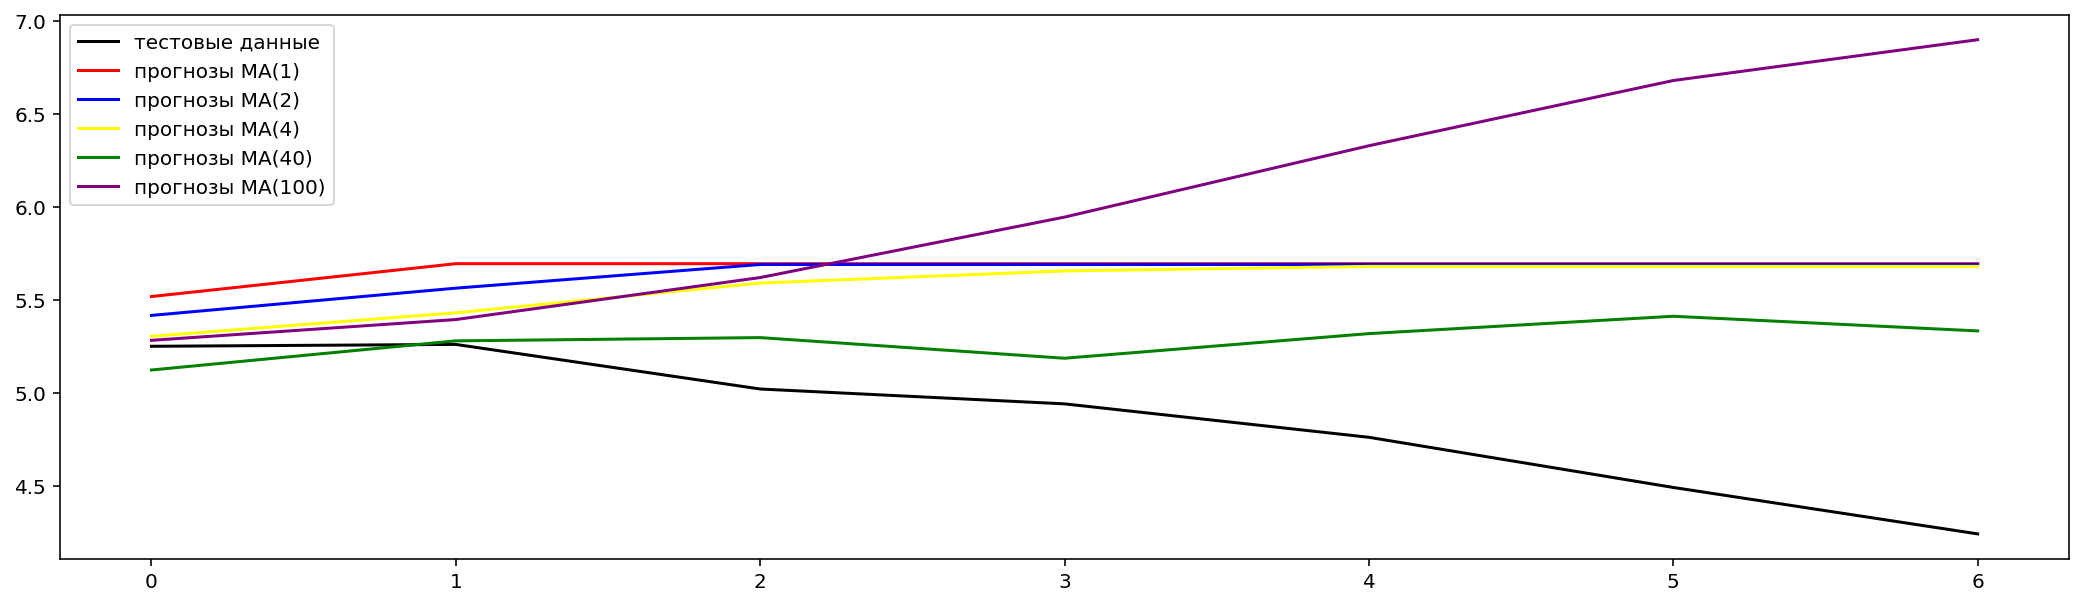

In [29]:
# построение моделей MA и их графиков выполним в цикле
colors = {1: "red", 2: "blue", 4: "yellow", 40: 'green', 100: 'purple'}
for i in periods:
    # обучим MA(i)-модель
    model = ARIMA(train, order=(0, 0, i))
    model_fit = model.fit()
    
    # выведем сводку по модели
    print(f'Сводка по модели МА({i})')
    display(model_fit.summary())
    
    # делаем прогнозы на 7 временных шагов вперед
    # для этого в методе .predict() задаем начало и конец 
    # периода прогнозирования
    predictions = model_fit.predict(
        start=len(train), end=len(train)+len(test)-1, dynamic=False)
    
    # напечатаем прогнозы на 7 временных шагов вперед
    print(f'Для MA({i})')
    for j in range(len(predictions)):
        print('спрогнозированное=%f, фактическое=%f' % (predictions[j], test[j]))
    # вычислим значение метрики RMSE
    rmse = np.sqrt(
        mean_squared_error(test, predictions))
    print(f'\nRMSE MA({i}) на тестовой выборке: %.3f' % rmse)
    
    # визуализируем прогнозы
    color = colors[i]
    if i == 1:
        plt.plot(test, label='тестовые данные', color = 'black')
    plt.plot(predictions, color=color, label=f'прогнозы MA({i})')
    plt.legend();

С ростом периода MA точность прогноза повышается до некоторого значения. При периоде равном 100 точность прогноза становится ниже особенно с ростом числа последующих прогнозов, это объясняю недостаточным количество значений исторической выборки для значения 100, т.к. кол-во значений в нашей выборки всего 637